# Compute Persistent Homology of 3-D Scans

### We have the middle segment from the 421 + 144 TCIA lung cancer samples formatted for analysis of Cubical Complexes

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import os
import gudhi as gd
import pandas as pd
import PersistenceImages.persistence_images as pimg

### Test the persistent homology pipeline

In [2]:
def BitmapToPhom(bitmap):
    l,w = np.shape(bitmap)
    
    cubical = gd.CubicalComplex(dimensions = [l,w], top_dimensional_cells = bitmap.flatten())
    phom = cubical.compute_persistence()
    phom_0 = cubical.persistence_intervals_in_dimension(0)
    phom_1 = cubical.persistence_intervals_in_dimension(1)

    return(phom_0, phom_1)

In [3]:
#Function to isolate just the middle slice
def middle_slice(scan):
    
    nslices = len(scan)
    middle = math.ceil(nslices/2)
    middle_slice = scan[middle]
    
    return middle_slice

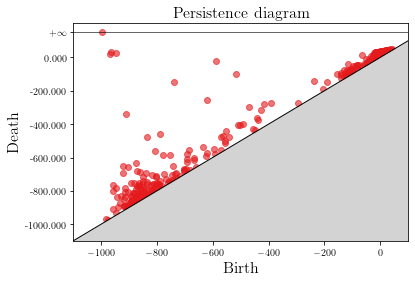

In [5]:
lung_test = np.load('./Radiogenomics_Arrays/R01-010.npy')
middle_test = middle_slice (lung_test)
phom_0, phom_1 = BitmapToPhom(middle_test)
gd.plot_persistence_diagram(phom_0)

### Read in files and normalize

In [6]:
#Radiomics Dataset
directory = os.fsencode('./Radiomics_Arrays')

all_rad_middle_scans = []
rad_maxes = []
rad_mins = []

for file in os.listdir(directory):
    filename = './Radiomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    middle = middle_slice(lung)
    
    rad_maxes.append(np.amax(middle))
    rad_mins.append(np.amin(middle))
    
    all_rad_middle_scans.append(middle)
    

    
#Radiogenomics Dataset
directory = os.fsencode('./Radiogenomics_Arrays')

all_radg_middle_scans = []
radg_maxes = []
radg_mins = []

for file in os.listdir(directory):
    filename = './Radiogenomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    middle = middle_slice(lung)
    
    radg_maxes.append(np.amax(middle))
    radg_mins.append(np.amin(middle))
    
    all_radg_middle_scans.append(middle)

In [7]:
#We want to normalize to [0,1]
grand_max = max(np.max(rad_maxes), np.max(radg_maxes))
grand_min = max(np.min(rad_mins), np.min(radg_mins))

all_rad_middle_scans_normalized = (all_rad_middle_scans - grand_min) / (grand_max - grand_min)
all_radg_middle_scans_normalized = (all_radg_middle_scans - grand_min) / (grand_max - grand_min)

C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [12]:
print(all_radg_middle_scans_normalized[-1])

[[0.03888238 0.08401719 0.16588511 ... 0.19148105 0.19460727 0.19421649]
 [0.08616647 0.15220789 0.19968738 ... 0.19089488 0.19245799 0.19128566]
 [0.16764361 0.21004299 0.21082454 ... 0.19089488 0.19421649 0.1957796 ]
 ...
 [0.21649082 0.22450176 0.30871434 ... 0.08518953 0.07639703 0.07131692]
 [0.21004299 0.22528331 0.28389996 ... 0.15298945 0.09456819 0.07835092]
 [0.21766315 0.22586948 0.25889019 ... 0.21414615 0.13266901 0.1031653 ]]


### Apply persistent homology pipeline to all files

In [9]:
#Radiomics Dataset

rad_phom_0s = []
rad_phom_1s = []

for tumor in all_rad_middle_scans_normalized:
    rad_phom_0, rad_phom_1 = BitmapToPhom(tumor)
    
    rad_phom_0s.append(rad_phom_0)
    rad_phom_1s.append(rad_phom_1)
    
    
#Radiogenomics Dataset

radg_phom_0s = []
radg_phom_1s = []

for tumor in all_radg_middle_scans_normalized:
    radg_phom_0, radg_phom_1 = BitmapToPhom(tumor)
    
    radg_phom_0s.append(radg_phom_0)
    radg_phom_1s.append(radg_phom_1)


In [14]:
print(rad_phom_0s[-1])

[[0.24579914 0.24912075]
 [0.24364986 0.25263775]
 [0.24736225 0.25263775]
 [0.24032825 0.25439625]
 [0.24716686 0.25752247]
 [0.24833919 0.25830403]
 [0.24892536 0.2622118 ]
 [0.25576397 0.26260258]
 [0.24618992 0.26279797]
 [0.25849941 0.26475186]
 [0.24931614 0.26514263]
 [0.25595936 0.26729191]
 [0.2604533  0.2674873 ]
 [0.25654553 0.2674873 ]
 [0.26690113 0.26807347]
 [0.26963658 0.2710043 ]
 [0.25263775 0.27237202]
 [0.28018757 0.28253224]
 [0.27315358 0.28292302]
 [0.26455647 0.28292302]
 [0.27178585 0.28311841]
 [0.2815553  0.28350918]
 [0.27921063 0.28370457]
 [0.26963658 0.28389996]
 [0.27373974 0.28507229]
 [0.26084408 0.28507229]
 [0.28331379 0.28761235]
 [0.28331379 0.28858929]
 [0.28819852 0.28898007]
 [0.28350918 0.28917546]
 [0.28624463 0.29034779]
 [0.29308324 0.29562329]
 [0.27295819 0.29562329]
 [0.27686596 0.29581868]
 [0.27061352 0.29581868]
 [0.2866354  0.29581868]
 [0.29406018 0.29660023]
 [0.29132474 0.29699101]
 [0.2919109  0.29835873]
 [0.27237202 0.2989449 ]


### Save persistent homology files so I only need to run this once

In [10]:
np.save('./Radiomics_Homology/rad_phom_middle_0s.npy', rad_phom_0s)
np.save('./Radiomics_Homology/rad_phom_middle_1s.npy', rad_phom_1s)

np.save('./Radiogenomics_Homology/radg_phom_middle_0s.npy', radg_phom_0s)
np.save('./Radiogenomics_Homology/radg_phom_middle_1s.npy', radg_phom_1s)


C:\Users\Adam\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
